In [1]:
from encoder import Encoder

import featuretools as ft
from featuretools.tests.testing_utils import make_ecommerce_entityset

W0729 21:52:33.738322 140338020951872 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [2]:
enc = Encoder()

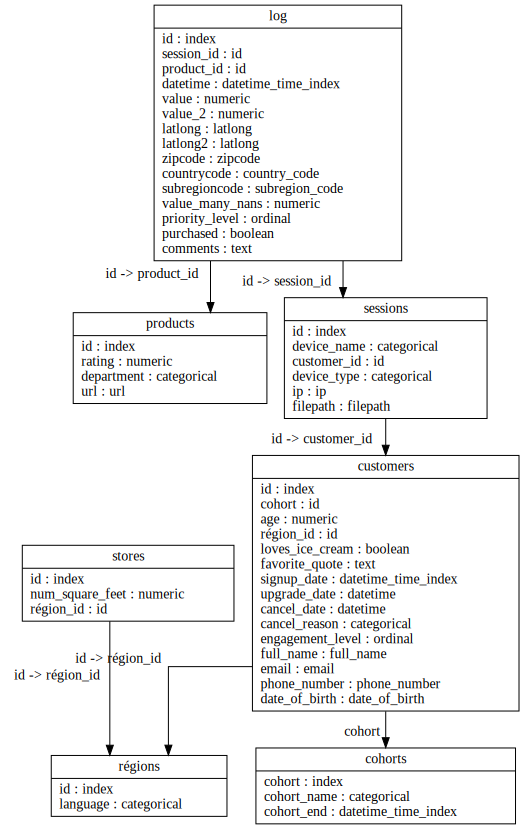

In [3]:
es = make_ecommerce_entityset()
es.plot()

In [4]:
f1 = ft.Feature(es["log"]["product_id"])
f2 = ft.Feature(es["log"]["purchased"])
f3 = ft.Feature(es["log"]["value"])
f4 = ft.Feature(es["log"]["countrycode"])

features = [f1, f2, f3, f4]
ids = [0, 1, 2, 3, 4, 5]
feature_matrix = ft.calculate_feature_matrix(features, es,
                                             instance_ids=ids)
feature_matrix

,product_id,purchased,value,countrycode
id,,,,
0,coke zero,True,0.0,US
1,coke zero,True,5.0,US
2,coke zero,True,10.0,US
3,car,True,15.0,US
4,car,True,20.0,US
5,toothpaste,True,0.0,AL


In [5]:
enc.fit(feature_matrix, features)

OneHotEncoder(cols=['product_id', 'countrycode'], drop_invariant=False,
       handle_missing='value', handle_unknown='value', return_df=True,
       use_cat_names=False, verbose=0)

In [6]:
enc.transform(feature_matrix)

,product_id_1,product_id_2,product_id_3,purchased,value,countrycode_1,countrycode_2
id,,,,,,,
0,1,0,0,True,0.0,1,0
1,1,0,0,True,5.0,1,0
2,1,0,0,True,10.0,1,0
3,0,1,0,True,15.0,1,0
4,0,1,0,True,20.0,1,0
5,0,0,1,True,0.0,0,1


In [7]:
enc.fit_transform(feature_matrix, features)

,product_id_1,product_id_2,product_id_3,purchased,value,countrycode_1,countrycode_2
id,,,,,,,
0,1,0,0,True,0.0,1,0
1,1,0,0,True,5.0,1,0
2,1,0,0,True,10.0,1,0
3,0,1,0,True,15.0,1,0
4,0,1,0,True,20.0,1,0
5,0,0,1,True,0.0,0,1


In [8]:
enc.get_features()

[]

In [9]:
enc.method

OneHotEncoder(cols=['product_id', 'countrycode'], drop_invariant=False,
       handle_missing='value', handle_unknown='value', return_df=True,
       use_cat_names=False, verbose=0)

In [10]:
enc = Encoder(method='Ordinal')
enc.fit_transform(feature_matrix, features)

,product_id,purchased,value,countrycode
id,,,,
0,1,True,0.0,1
1,1,True,5.0,1
2,1,True,10.0,1
3,2,True,15.0,1
4,2,True,20.0,1
5,3,True,0.0,2


In [11]:
enc.get_features()

product_id
purchased
value
countrycode


[<Feature: product_id_OrdinalEncoder>,
 <Feature: purchased>,
 <Feature: value>,
 <Feature: countrycode_OrdinalEncoder>]

In [12]:
enc.method

OrdinalEncoder(cols=['product_id', 'countrycode'], drop_invariant=False,
        handle_missing='value', handle_unknown='value',
        mapping=[{'col': 'product_id', 'mapping': coke zero     1
car           2
toothpaste    3
NaN          -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'countrycode', 'mapping': US     1
AL     2
NaN   -2
dtype: int64, 'data_type': dtype('O')}],
        return_df=True, verbose=0)